#library install


In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [65]:
df = pd.read_csv("linear_line-datas.csv")

In [ ]:
df.head()

,height,weight,predict,error
0,4.753198,18.144798,17.541606,0.603192
1,7.482920,20.002888,26.278097,-6.275209
2,1.001029,4.084733,5.532771,-1.448037
3,3.720993,16.327152,14.238029,2.089123
4,2.320803,9.982894,9.756713,0.226181


In [67]:
df.duplicated().sum()

np.int64(0)

In [126]:
df.isna().sum()

height     0
weight     0
predict    0
error      0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [70]:
df.describe()

,x,y
count,100.000000,100.000000
mean,5.372901,19.463537
std,2.662962,8.798315
min,1.001029,-0.007462
25%,2.888507,11.759102
50%,5.236684,19.541428
75%,7.495686,26.635032
max,9.899750,35.239938


In [71]:
df = df.rename(columns={"x":"height", "y":"weight"})

In [72]:
df.head()

,height,weight
0,4.753198,18.144798
1,7.482920,20.002888
2,1.001029,4.084733
3,3.720993,16.327152
4,2.320803,9.982894


Text(0.5, 1.0, '<----relation betwin height and weight---->')

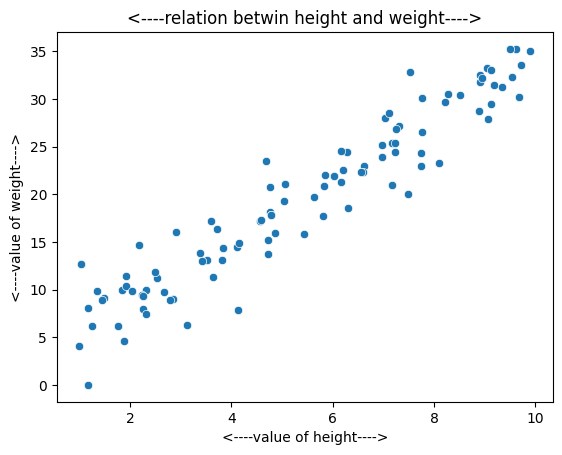

In [145]:
plt.Figure(figsize=(6,4))
sns.scatterplot(x="height", y="weight", data=df)
plt.xlabel("<----value of height---->")
plt.ylabel("<----value of weight---->")
plt.title("<----relation betwin height and weight---->")

<Axes: >

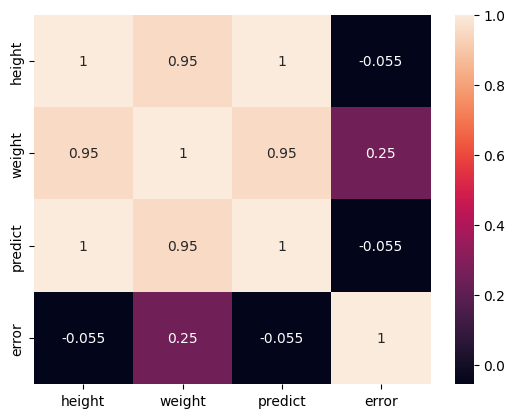

In [121]:
plt.Figure(figsize=(4,3))
sns.heatmap(df.corr(), annot=True)

#data separation


In [122]:
df.head()

,height,weight,predict,error
0,4.753198,18.144798,17.541606,0.603192
1,7.482920,20.002888,26.278097,-6.275209
2,1.001029,4.084733,5.532771,-1.448037
3,3.720993,16.327152,14.238029,2.089123
4,2.320803,9.982894,9.756713,0.226181


In [75]:
x = df[["height"]]
y = df[["weight"]]

In [76]:
x.head()

,height
0,4.753198
1,7.482920
2,1.001029
3,3.720993
4,2.320803


In [77]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.15)

In [78]:
lr= LinearRegression()

#train the data

In [79]:
model = lr.fit(xtrain, ytrain)


#ck the train data score

In [83]:
model.score(xtrain, ytrain)

0.9117810429876148

In [84]:
model.score(xtest, ytest)

0.8589145687268842

In [85]:
xtest.head()

,height
96,9.130416
87,9.683560
58,6.303750
98,1.025833
69,6.278995


In [86]:
ytest.head()

,weight
96,29.483101
87,30.230491
58,18.547013
98,12.668934
69,24.407970


#prediction generate

In [88]:
pred_y = model.predict([[96]])
pred_y

c:\Users\h\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[309.57746979]])

In [125]:
df.head()

,height,weight,predict,error
0,4.753198,18.144798,17.541606,0.603192
1,7.482920,20.002888,26.278097,-6.275209
2,1.001029,4.084733,5.532771,-1.448037
3,3.720993,16.327152,14.238029,2.089123
4,2.320803,9.982894,9.756713,0.226181


In [ ]:
df["predict"] = model.predict(df[["height"]])

In [124]:
df.head()

,height,weight,predict,error
0,4.753198,18.144798,17.541606,0.603192
1,7.482920,20.002888,26.278097,-6.275209
2,1.001029,4.084733,5.532771,-1.448037
3,3.720993,16.327152,14.238029,2.089123
4,2.320803,9.982894,9.756713,0.226181


In [ ]:
df["error"] = df["weight"] - df["predict"]
df.head()

,height,weight,predict,error
0,4.753198,18.144798,17.541606,0.603192
1,7.482920,20.002888,26.278097,-6.275209
2,1.001029,4.084733,5.532771,-1.448037
3,3.720993,16.327152,14.238029,2.089123
4,2.320803,9.982894,9.756713,0.226181


In [128]:
ytest.head()

,weight
96,29.483101
87,30.230491
58,18.547013
98,12.668934
69,24.407970


In [131]:
y_pred = model.predict(xtest)


In [135]:
#mse for checking errors

mse = mean_squared_error(ytest, y_pred)
mse

8.773237261120185

In [136]:
mae = mean_absolute_error(ytest, y_pred)
mae

2.4789185882533387

In [140]:
#ck scores

r_value = r2_score(ytest, y_pred)
r_value

0.8589145687268842

In [141]:
# find the value of m

m = model.coef_
m

array([[3.2005052]])

In [143]:
# find the value of c
c = model.intercept_
c

array([2.32897099])

In [144]:
y = m*50 + c
y

array([[162.35423078]])

Text(0.5, 1.0, '<----relation betwin height and weight---->')

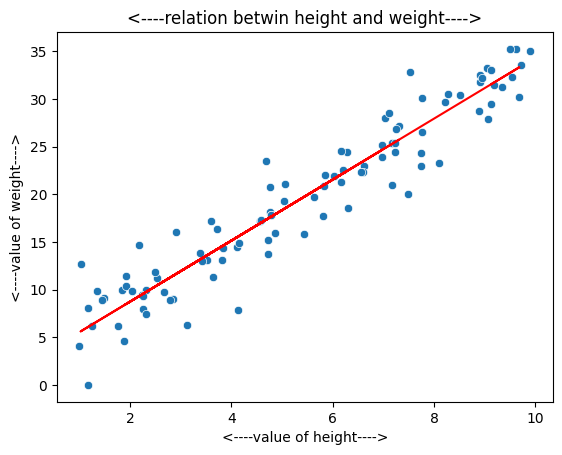

In [146]:
# best fit line
plt.Figure(figsize=(6,4))
sns.scatterplot(x="height", y="weight", data=df)
plt.plot(xtest, y_pred, color = "r")
plt.xlabel("<----value of height---->")
plt.ylabel("<----value of weight---->")
plt.title("<----relation betwin height and weight---->")
